In [186]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [187]:
data1 = pd.read_excel('HDI.xlsx')
data.head()

,geo,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


In [188]:
data2 = pd.read_excel('contraceptive_use_percent_of_women_ages_15_49.xlsx')
data2.head()

,geo,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,22.8,NaN,21.8,21.2,NaN,NaN,NaN,22.5,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,69.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,55.9,57.1,NaN,NaN,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,17.7,NaN,NaN,NaN,NaN,NaN,NaN,13.7
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
data3 = pd.read_excel('children_per_woman_total_fertility.xlsx')
data3.head()

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03


In [190]:
data4 = pd.read_excel('mean_years_in_school_women_of_reproductive_age_15_to_44.xlsx')
data4.head()

,geo,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,...,0.5,0.5,0.5,0.6,0.6,0.6,0.7,0.7,0.7,0.8
1,Albania,5.6,5.7,5.9,6.0,6.2,6.3,6.5,6.6,6.8,...,9.8,9.9,10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7
2,Algeria,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,...,5.8,5.9,6.1,6.2,6.4,6.5,6.7,6.8,6.9,7.1
3,Angola,0.9,1.0,1.0,1.1,1.1,1.2,1.2,1.3,1.4,...,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.3,4.4,4.5
4,Antigua and Barbuda,8.1,8.3,8.5,8.7,8.8,9.0,9.2,9.4,9.6,...,12.7,12.8,12.9,13.0,13.1,13.2,13.3,13.3,13.4,13.5


In [191]:
IDH_2000 = data1.loc[:,['geo',2000]]
uso_contraceptivo_2000 = data2.loc[:,['geo',2000]]
fertilidade_2000 = data3.loc[:,['geo',2000]]
escolaridade_feminina_2000 = data4.loc[:,['geo',2000]]

#IDH_2000.head()
#uso_contraceptivo_2000.head(10)
#fertilidade_2000.head()
escolaridade_feminina_2000.head()

,geo,2000
0,Afghanistan,0.5
1,Albania,9.8
2,Algeria,5.8
3,Angola,3.5
4,Antigua and Barbuda,12.7


In [192]:
IDH_idx = IDH_2000.set_index('geo')
uso_contraceptivo_idx = uso_contraceptivo_2000.set_index('geo')
fertilidade_idx = fertilidade_2000.set_index('geo')
escolaridade_feminina_idx = escolaridade_feminina_2000.set_index('geo')

#IDH_idx.head()
#uso_contraceptivo_idx.head()
#fertilidade_idx.head()
escolaridade_feminina_idx.head()

,2000
geo,
Afghanistan,0.5
Albania,9.8
Algeria,5.8
Angola,3.5
Antigua and Barbuda,12.7


In [193]:
df1 = IDH_idx.join(uso_contraceptivo_idx, how='inner', lsuffix='_IDH', rsuffix='_uso contraceptivo')
df1.head()

,2000_IDH,2000_uso contraceptivo
geo,,
Afghanistan,0.340,5.3
Albania,0.662,57.5
Algeria,0.644,64.0
Angola,0.391,NaN
Antigua and Barbuda,NaN,NaN


In [194]:
df2 = df1.join(fertilidade_idx, how='inner', rsuffix='_fertilidade')
df2.head()

,2000_IDH,2000_uso contraceptivo,2000
geo,,,
Afghanistan,0.340,5.3,7.49
Albania,0.662,57.5,2.16
Algeria,0.644,64.0,2.51
Angola,0.391,NaN,6.64
Antigua and Barbuda,NaN,NaN,2.32


In [195]:
df3 = df2.join(escolaridade_feminina_idx, how='inner', rsuffix='_anos médios na escola')
df3.head()

,2000_IDH,2000_uso contraceptivo,2000,2000_anos médios na escola
geo,,,,
Afghanistan,0.340,5.3,7.49,0.5
Albania,0.662,57.5,2.16,9.8
Algeria,0.644,64.0,2.51,5.8
Angola,0.391,NaN,6.64,3.5
Antigua and Barbuda,NaN,NaN,2.32,12.7


In [196]:
df3.columns=['2000_IDH', '2000_média_uso_contraceptivo_mulheres', '2000_fertilidade', '2000_média_anos_escola_mulheres']
df3.head()

,2000_IDH,2000_média_uso_contraceptivo_mulheres,2000_fertilidade,2000_média_anos_escola_mulheres
geo,,,,
Afghanistan,0.340,5.3,7.49,0.5
Albania,0.662,57.5,2.16,9.8
Algeria,0.644,64.0,2.51,5.8
Angola,0.391,NaN,6.64,3.5
Antigua and Barbuda,NaN,NaN,2.32,12.7


In [197]:
df3.to_excel("Base_limpa.xlsx")

AGORA QUE A BRINCADEIRA COMEÇA!!! BIRL!!!

In [198]:
df3['2000_IDH'].describe()

count    154.000000
mean       0.616383
std        0.171520
min        0.255000
25%        0.457750
50%        0.644500
75%        0.747250
max        0.917000
Name: 2000_IDH, dtype: float64

In [199]:
df3['2000_média_uso_contraceptivo_mulheres'].describe()

count    74.000000
mean     45.006757
std      22.167484
min       4.300000
25%      28.400000
50%      44.850000
75%      63.675000
max      83.800000
Name: 2000_média_uso_contraceptivo_mulheres, dtype: float64

In [200]:
df3['2000_fertilidade'].describe()

count    169.000000
mean       3.385089
std        1.779219
min        1.120000
25%        1.820000
50%        2.890000
75%        4.600000
max        7.680000
Name: 2000_fertilidade, dtype: float64

In [201]:
df3['2000_média_anos_escola_mulheres'].describe()

count    169.000000
mean       7.791124
std        3.592367
min        0.500000
25%        4.500000
50%        8.400000
75%       11.000000
max       14.100000
Name: 2000_média_anos_escola_mulheres, dtype: float64

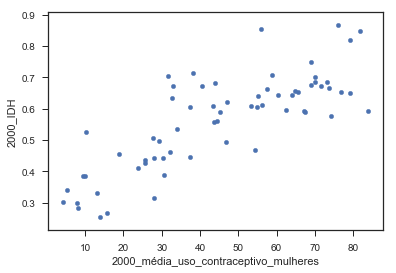

In [202]:
df3.plot.scatter(x="2000_média_uso_contraceptivo_mulheres", y = '2000_IDH', loglog=False);

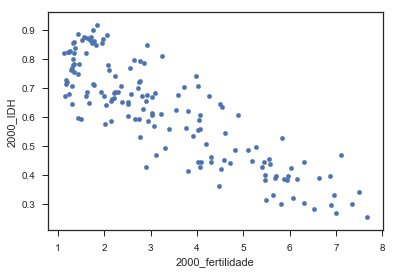

In [203]:
df3.plot.scatter(x="2000_fertilidade", y = '2000_IDH', loglog=False);

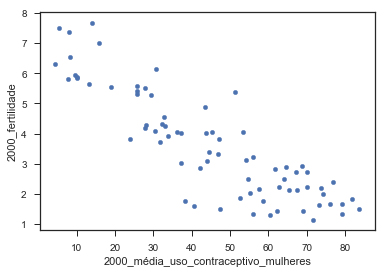

In [204]:
df3.plot.scatter(y="2000_fertilidade", x = '2000_média_uso_contraceptivo_mulheres', loglog=False);

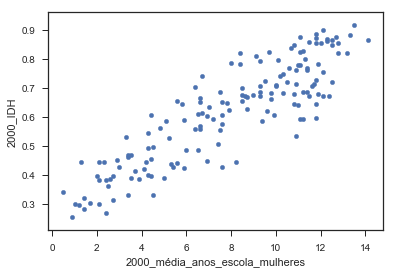

In [205]:
df3.plot.scatter(y="2000_IDH", x = '2000_média_anos_escola_mulheres', loglog=False);

In [206]:
df3['2000_média_anos_escola_mulheres'].describe()

count    169.000000
mean       7.791124
std        3.592367
min        0.500000
25%        4.500000
50%        8.400000
75%       11.000000
max       14.100000
Name: 2000_média_anos_escola_mulheres, dtype: float64

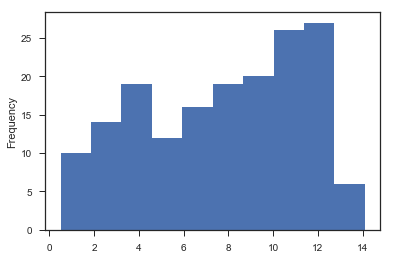

In [207]:
df3['2000_média_anos_escola_mulheres'].plot.hist()

In [208]:
escolaridade = pd.cut(df3['2000_média_anos_escola_mulheres'], bins=8)
escolaridade.head()

geo
Afghanistan            (0.486, 2.2]
Albania                 (9.0, 10.7]
Algeria                  (5.6, 7.3]
Angola                   (2.2, 3.9]
Antigua and Barbuda    (12.4, 14.1]
Name: 2000_média_anos_escola_mulheres, dtype: category
Categories (8, interval[float64]): [(0.486, 2.2] < (2.2, 3.9] < (3.9, 5.6] < (5.6, 7.3] < (7.3, 9.0] < (9.0, 10.7] < (10.7, 12.4] < (12.4, 14.1]]

In [209]:
IDH = pd.cut(df3['2000_IDH'], bins=8)

In [210]:
escolaridade.value_counts()

(10.7, 12.4]    39
(9.0, 10.7]     26
(7.3, 9.0]      22
(5.6, 7.3]      19
(3.9, 5.6]      19
(2.2, 3.9]      19
(0.486, 2.2]    14
(12.4, 14.1]    11
Name: 2000_média_anos_escola_mulheres, dtype: int64

In [211]:
escolaridade_ct=escolaridade.sort_values(ascending=True).head()

In [212]:
ct = pd.crosstab(index=escolaridade, columns = IDH)
ct

2000_IDH,"(0.254, 0.338]","(0.338, 0.42]","(0.42, 0.503]","(0.503, 0.586]","(0.586, 0.669]","(0.669, 0.752]","(0.752, 0.834]","(0.834, 0.917]"
2000_média_anos_escola_mulheres,,,,,,,,
"(0.486, 2.2]",7,3,2,0,0,0,0,0
"(2.2, 3.9]",3,7,6,1,0,0,0,0
"(3.9, 5.6]",1,3,8,3,3,0,0,0
"(5.6, 7.3]",0,0,4,3,9,2,0,0
"(7.3, 9.0]",0,0,2,3,6,6,3,0
"(9.0, 10.7]",0,0,0,0,4,11,5,1
"(10.7, 12.4]",0,0,0,1,6,11,10,10
"(12.4, 14.1]",0,0,0,0,0,1,2,7


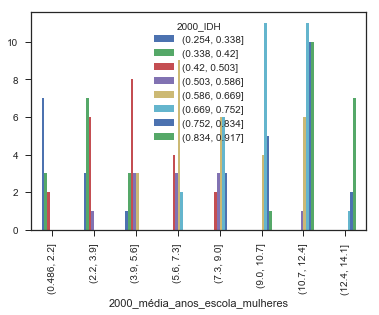

In [213]:
ct.plot.bar()

In [214]:
df3.head()

,2000_IDH,2000_média_uso_contraceptivo_mulheres,2000_fertilidade,2000_média_anos_escola_mulheres
geo,,,,
Afghanistan,0.340,5.3,7.49,0.5
Albania,0.662,57.5,2.16,9.8
Algeria,0.644,64.0,2.51,5.8
Angola,0.391,NaN,6.64,3.5
Antigua and Barbuda,NaN,NaN,2.32,12.7


In [215]:
regiao = pd.read_excel("landlocked_region.xlsx")
regiao.head()

,Country,region,landlocked
0,Albania,europe_east,0
1,Algeria,africa_north,0
2,Angola,africa_sub_saharan,0
3,Antigua and Barbuda,america_north,0
4,Argentina,america_south,0


In [216]:
regiao_idx = regiao.set_index("Country")
regiao_idx.head()

,region,landlocked
Country,,
Albania,europe_east,0
Algeria,africa_north,0
Angola,africa_sub_saharan,0
Antigua and Barbuda,america_north,0
Argentina,america_south,0


In [217]:
df4 = df3.join(regiao_idx, how='inner')
df4.head()

,2000_IDH,2000_média_uso_contraceptivo_mulheres,2000_fertilidade,2000_média_anos_escola_mulheres,region,landlocked
Albania,0.662,57.5,2.16,9.8,europe_east,0
Algeria,0.644,64.0,2.51,5.8,africa_north,0
Angola,0.391,NaN,6.64,3.5,africa_sub_saharan,0
Antigua and Barbuda,NaN,NaN,2.32,12.7,america_north,0
Argentina,0.771,NaN,2.56,10.6,america_south,0


In [237]:
df5=df4.loc[:,['2000_IDH','2000_média_uso_contraceptivo_mulheres','2000_fertilidade','2000_média_anos_escola_mulheres','region']].dropna()

df5.to_excel("Base_limpa.xlsx")

df5.head()



,2000_IDH,2000_média_uso_contraceptivo_mulheres,2000_fertilidade,2000_média_anos_escola_mulheres,region
Albania,0.662,57.5,2.16,9.8,europe_east
Algeria,0.644,64.0,2.51,5.8,africa_north
Armenia,0.644,60.5,1.30,10.8,europe_east
Azerbaijan,0.642,55.1,2.03,11.0,europe_east
Bangladesh,0.468,54.3,3.12,3.5,asia_west


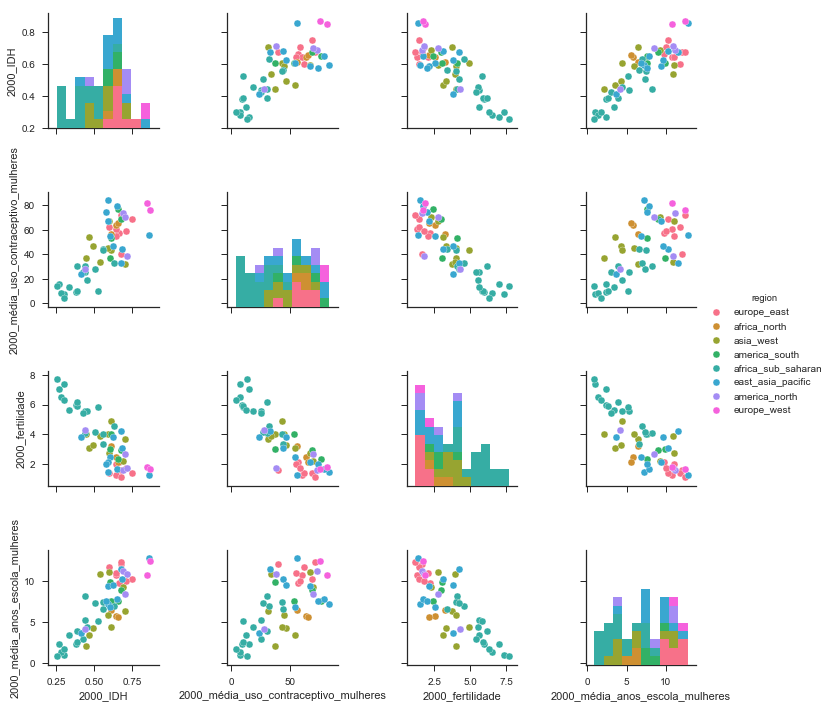

In [225]:
sns.set(style="ticks")

sns.pairplot(df5,hue="region")

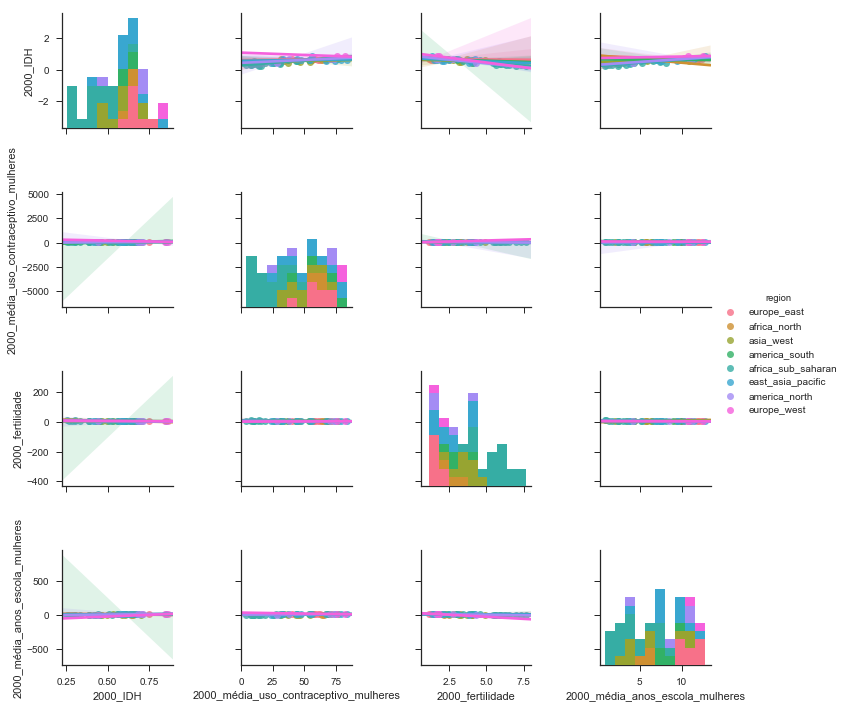

In [233]:
sns.pairplot(df5, kind="reg", hue="region")

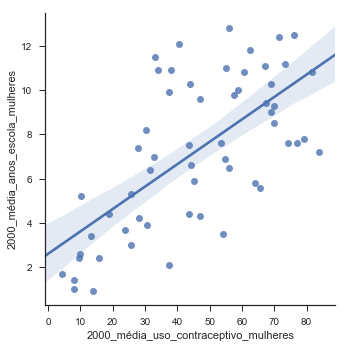

In [236]:
sns.lmplot(x='2000_média_uso_contraceptivo_mulheres',y='2000_média_anos_escola_mulheres',data=df5)